In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt("VIS_SOURCE0001.trt", delimiter=";", skiprows=7)
wavelength_source = data[:,0]
intensity_source = data[:,1]

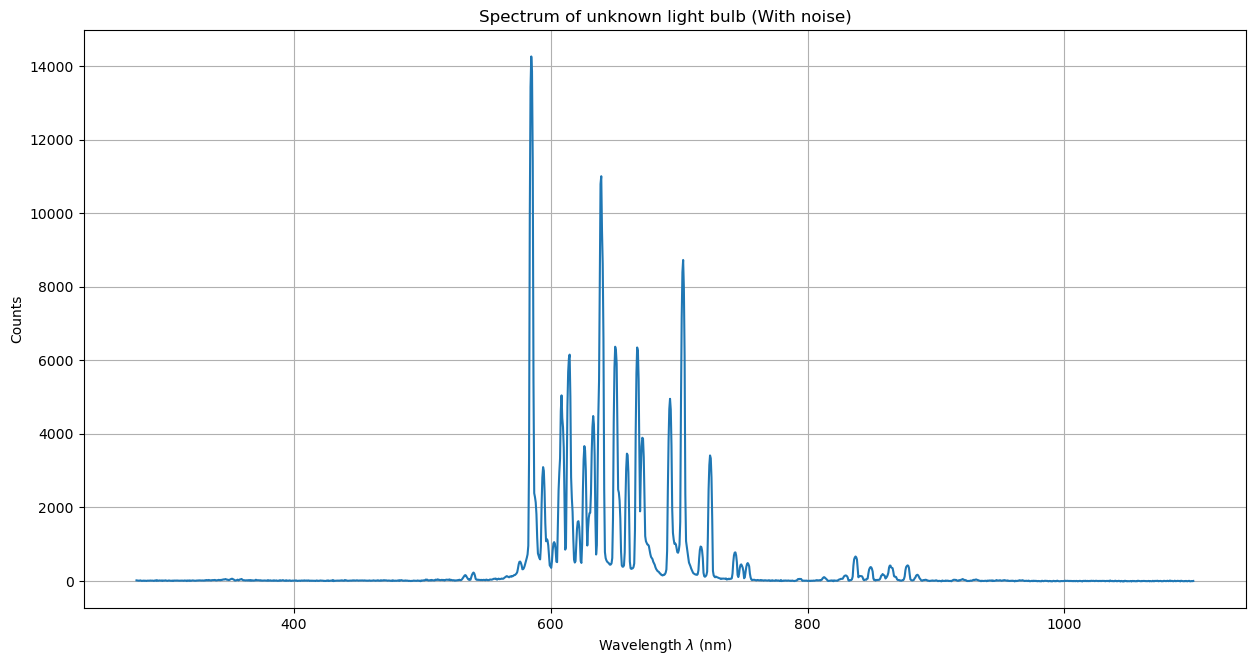

In [3]:
##Plot the data
plt.figure(figsize = (15,7.5))
plt.plot(wavelength_source, intensity_source) 
plt.xlabel(r"Wavelength $\lambda$ (nm)")
plt.ylabel("Counts")
plt.title("Spectrum of unknown light bulb (With noise)")
plt.grid()
plt.show()    

In [4]:
data = np.loadtxt("VIS_SOURCE0002.trt", delimiter=";", skiprows=7)
wavelength_bg = data[:,0]
intensity_bg = data[:,1]

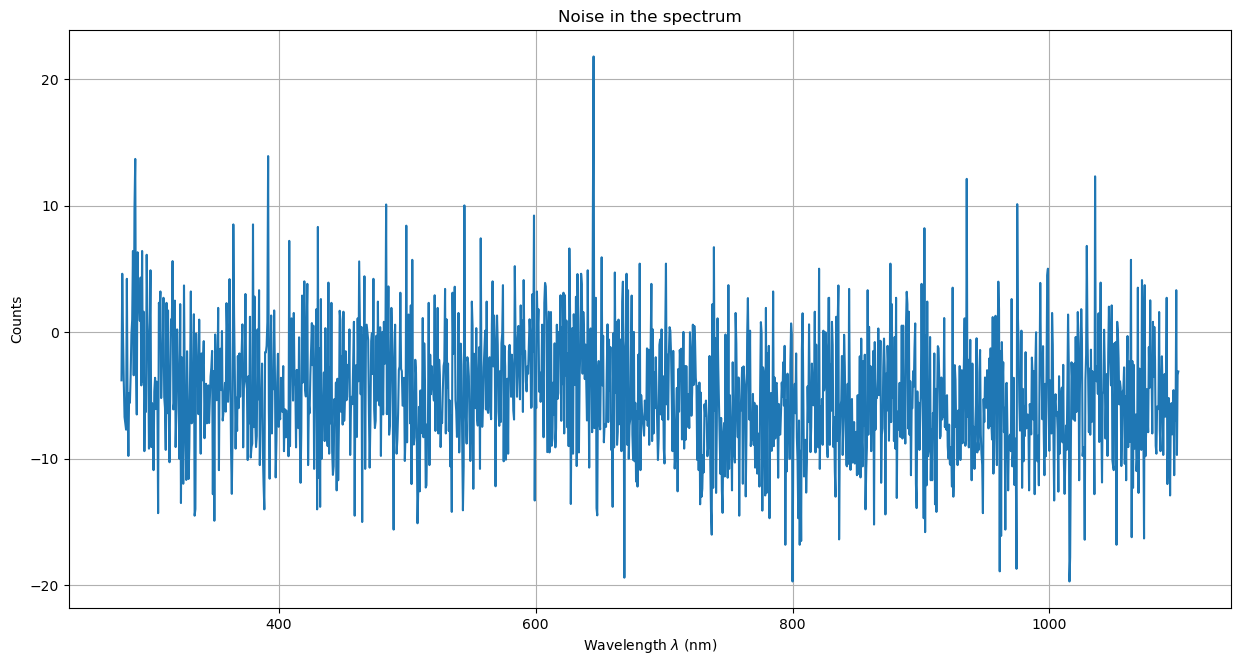

In [5]:
##Plot the data
plt.figure(figsize = (15,7.5))
plt.plot(wavelength_bg, intensity_bg) 
plt.xlabel(r"Wavelength $\lambda$ (nm)")
plt.ylabel("Counts")
plt.title("Noise in the spectrum")
plt.grid()
plt.show() 

In [6]:
data = intensity_source-intensity_bg

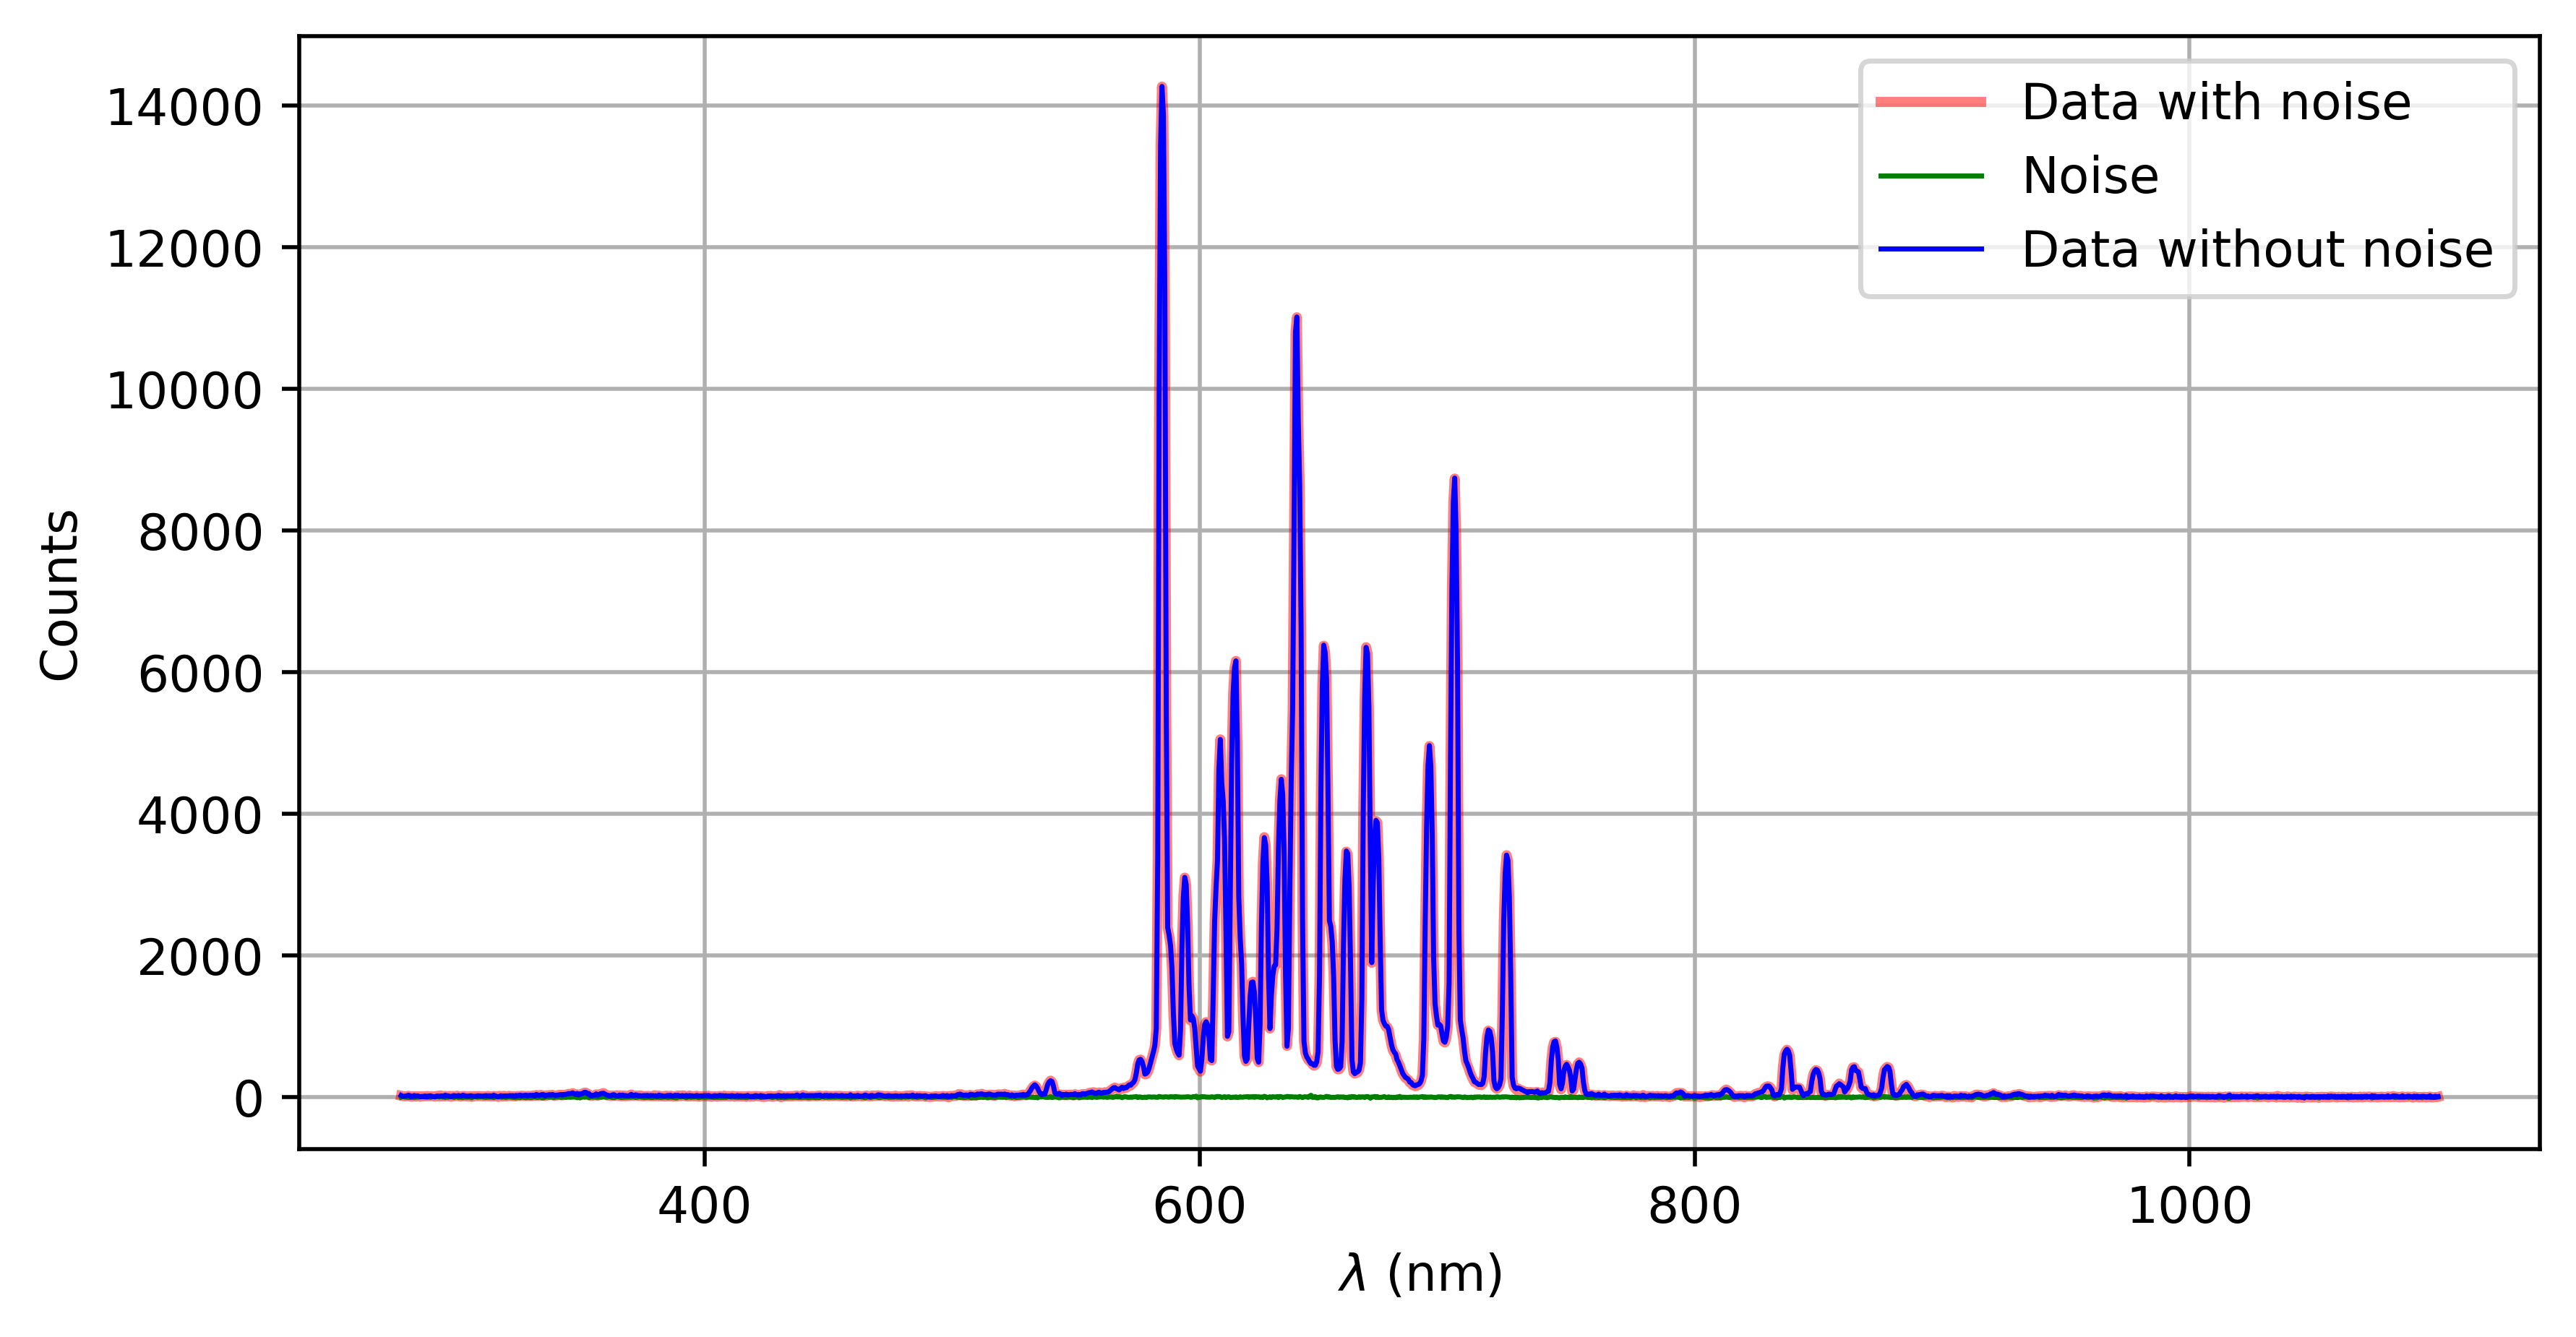

In [7]:
plt.figure(dpi = 500, figsize = (8,4))
plt.plot(wavelength_source, intensity_source, linewidth = 2, color = 'r', alpha = 0.5, label = "Data with noise")
plt.plot(wavelength_source, intensity_bg, linewidth = 1, color = 'g', label = "Noise")
plt.plot(wavelength_source, data, linewidth = 1, color = 'b', label = "Data without noise")
plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel("Counts")
plt.grid()
plt.legend()
plt.show()

In [8]:
##Finding the peaks of the data
peaks = []
values = []
for i in range(1, len(wavelength_source) - 2):
    if data[i] > 169 and data[i] > data[i-1] and data[i] > data[i+1]:
        peaks.append(wavelength_source[i])
        values.append(data[i])
    else:
        peaks = peaks

In [9]:
print(peaks)
print(values)

[533.44, 539.81, 576.18, 584.82, 594.03, 596.9, 602.65, 608.39, 614.7, 621.58, 626.16, 633.03, 639.32, 650.17, 659.3, 667.28, 671.27, 692.87, 696.84, 703.08, 716.68, 724.03, 743.79, 748.3, 753.37, 837.32, 848.99, 858.43, 864.52, 877.8, 885.54]
[169.78, 227.375, 529.1700000000001, 14265.875, 3098.5750000000003, 1144.9, 1060.2, 5045.900000000001, 6155.775, 1621.875, 3660.375, 4483.575, 11011.0, 6377.275000000001, 3470.7749999999996, 6346.575, 3903.5, 4959.1, 1022.6750000000001, 8736.5, 943.88, 3413.175, 788.2800000000001, 459.18, 488.475, 671.375, 386.67, 184.675, 425.46999999999997, 427.96999999999997, 176.67000000000002]


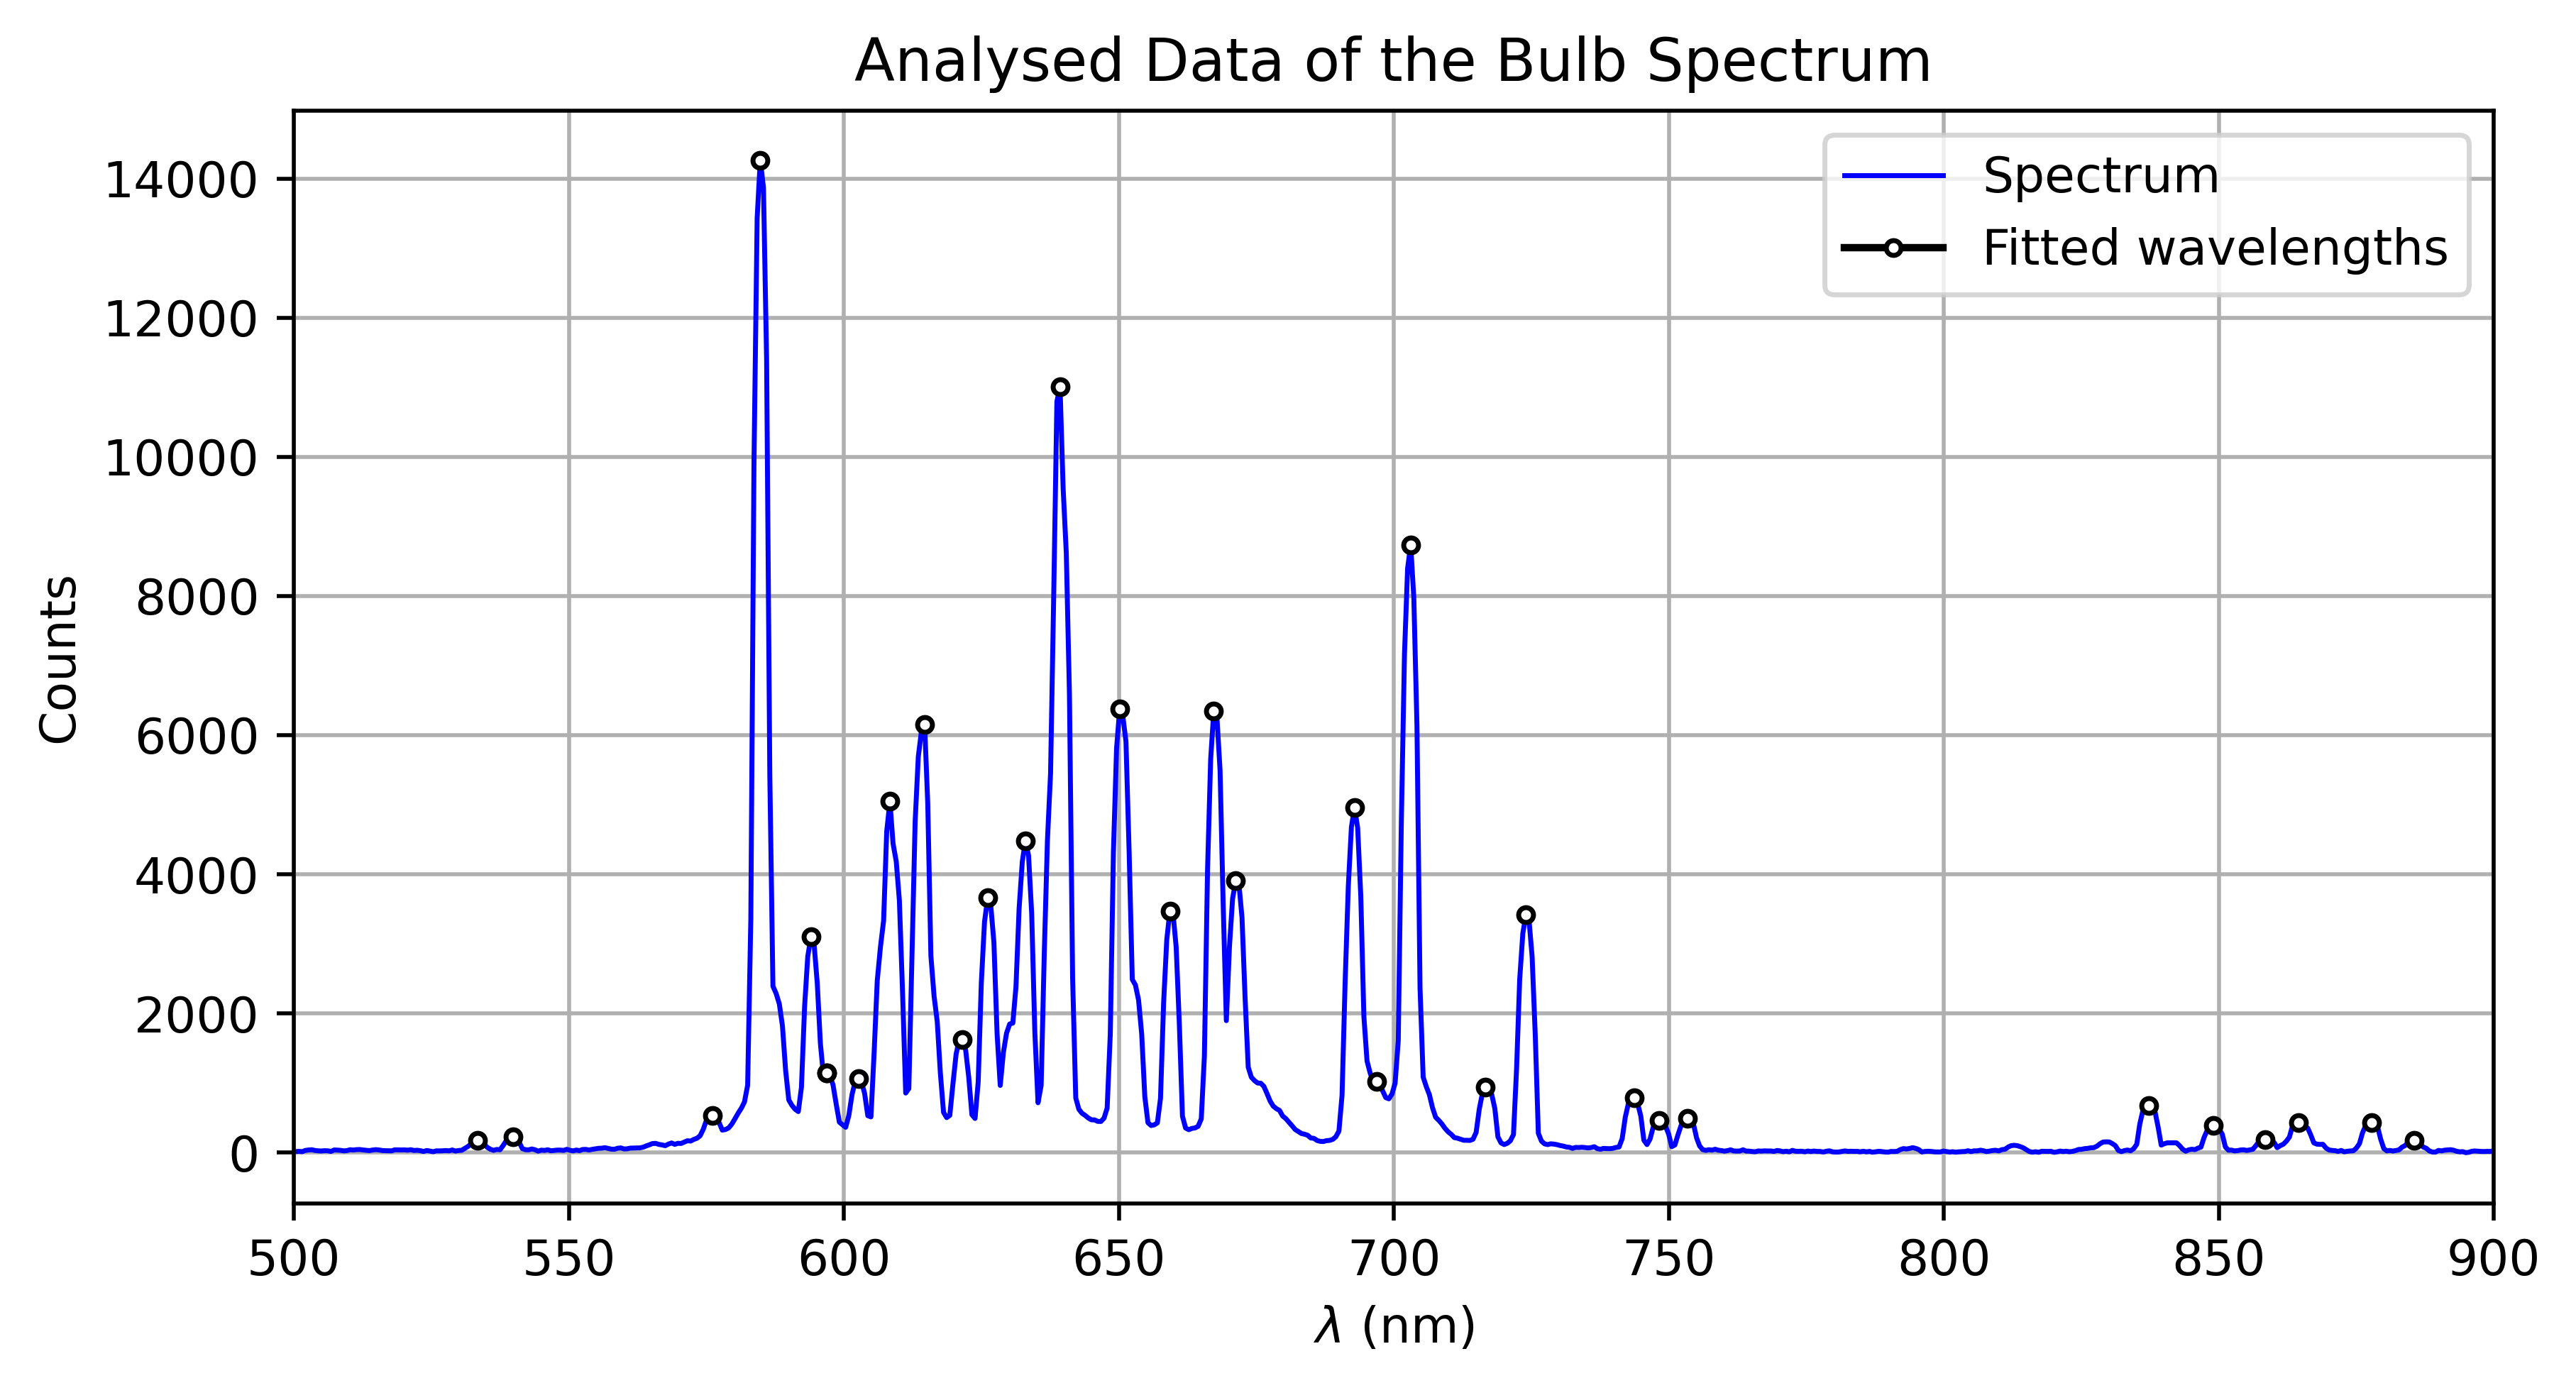

In [18]:
plt.figure(dpi = 500, figsize = (8,4))
plt.plot(wavelength_source, data, linewidth = 1, color = 'b', label = "Spectrum")

for i in range(len(peaks)):
    # plt.vlines(peaks[i], 0, values[i], color = 'r', lw = 0.8)
    plt.plot(peaks[i], values[i], marker = "o", color = 'k', mfc = 'w', ms = 3)
    
plt.plot(peaks[5], values[5], marker = "o", color = 'k', mfc = 'w', label = "Fitted wavelengths" , ms = 3)
plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel("Counts")
plt.xlim([500,900])
plt.grid()
plt.legend()
plt.title("Analysed Data of the Bulb Spectrum")
plt.show()